<a href="https://colab.research.google.com/github/pjaime357/FormularioConfirmacion/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
data = pd.concat([tienda, tienda2, tienda3, tienda4])
data['total_price'] = data['Precio'] * data['Cantidad de cuotas']
ingreso = data['total_price'].sum()
print(f"El ingreso total es: {ingreso}")

El ingreso total es: 13102551000.0


# 2. Ventas por categoría

In [11]:
data = pd.concat([tienda, tienda2, tienda3, tienda4])
data['total_price'] = data['Precio'] * data['Cantidad de cuotas']
data['categoria del producto'] = data['Categoría del Producto']
ventas_por_categoria = data.groupby('categoria del producto')['total_price'].sum()
print(ventas_por_categoria)

categoria del producto
Artículos para el hogar    1.703604e+08
Deportes y diversión       4.320055e+08
Electrodomésticos          4.019072e+09
Electrónicos               4.889815e+09
Instrumentos musicales     1.044612e+09
Juguetes                   2.116156e+08
Libros                     1.130887e+08
Muebles                    2.221981e+09
Name: total_price, dtype: float64


# 3. Calificación promedio de la tienda


In [13]:
data = pd.concat([tienda, tienda2, tienda3, tienda4])
calificacion_promedio = data['Calificación'].mean()
print(f"La calificación promedio de la tienda es: {calificacion_promedio}")

La calificación promedio de la tienda es: 4.014520402755696


# 4. Productos más y menos vendidos

In [14]:
data = pd.concat([tienda, tienda2, tienda3, tienda4])
productos_mas_vendidos = data.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False)
productos_menos_vendidos = data.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=True)
print("Productos más vendidos:")
print(productos_mas_vendidos)

Productos más vendidos:
Producto
Secadora de ropa               649
Mesa de noche                  627
Pandereta                      625
Bicicleta                      614
Iphone 15                      611
Cama king                      603
Set de ollas                   601
Microondas                     600
Guitarra acústica              595
Batería                        595
Silla de oficina               588
Refrigerador                   583
Cama box                       578
Iniciando en programación      574
Bloques de construcción        573
Auriculares                    572
Modelado predictivo            566
Carrito de control remoto      566
Smart TV                       558
Ciencia de datos con Python    554
Armario                        554
TV LED UHD 4K                  551
Cubertería                     549
Dashboards con Power BI        545
Lavadora de ropa               541
Vaso térmico                   537
Mesa de comedor                535
Sofá reclinable       

# 5. Envío promedio por tienda

In [19]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

In [20]:
data = pd.concat([tienda, tienda2, tienda3, tienda4])
envio_promedio_por_tienda = data.groupby('Tienda')['Costo de envío'].mean()
print("Costo promedio de envío por tienda:")
print(envio_promedio_por_tienda)

Costo promedio de envío por tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


Generacion de Graficas para el analisis visual

In [21]:
#Vamos a importar las librerias que necesitaremos
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-870/3318709982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette='viridis')


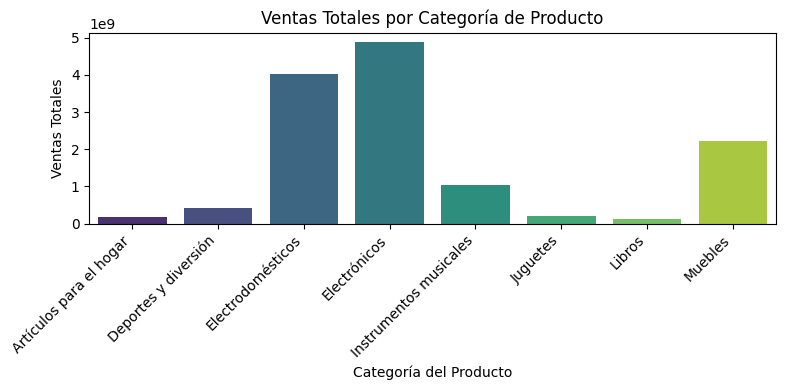

In [23]:
plt.figure(figsize=(8, 4))
sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette='viridis')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Categoría de Producto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-870/91673695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productos_mas_vendidos.index, y=productos_mas_vendidos.values, palette='viridis')


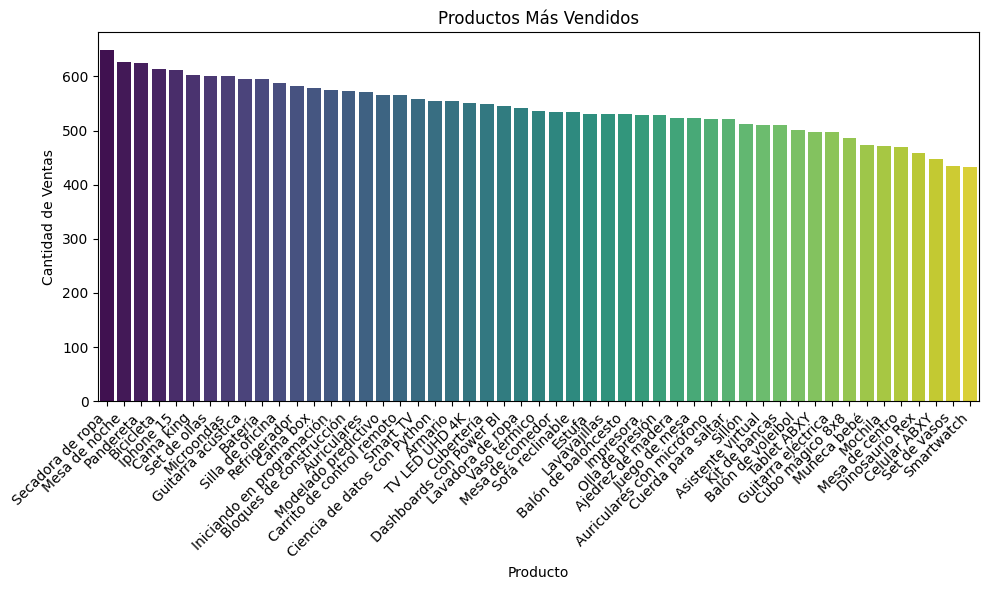

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=productos_mas_vendidos.index, y=productos_mas_vendidos.values, palette='viridis')
plt.xlabel('Producto')
plt.ylabel('Cantidad de Ventas')
plt.title('Productos Más Vendidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()